In [10]:
import numpy as np
import pandas as pd
from sklearn import datasets


In [11]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df=df[df['species']!=0][['sepal width (cm)',	'petal length (cm)',	'species']]
df.head()

,sepal width (cm),petal length (cm),species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


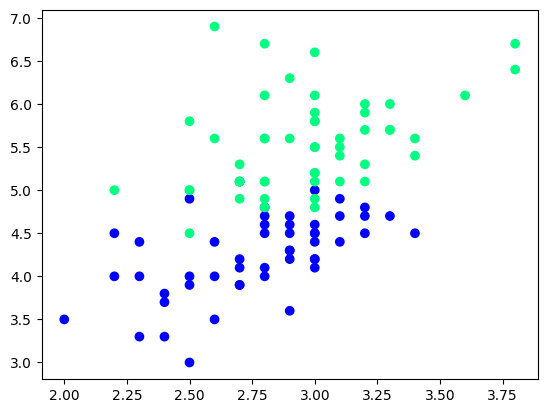

In [16]:
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'],c=df['species'],cmap='winter')

In [18]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal width (cm),petal length (cm),species
107,2.9,6.3,2
60,2.0,3.5,1
102,3.0,5.9,2
56,3.3,4.7,1
55,2.8,4.5,1
67,2.7,4.1,1
71,2.8,4.0,1
62,2.2,4.0,1
59,2.7,3.9,1
50,3.2,4.7,1


In [19]:
df

,sepal width (cm),petal length (cm),species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [21]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [22]:
df_train

,sepal width (cm),petal length (cm),species
140,3.1,5.6,2
106,2.5,4.5,2
116,3.0,5.5,2
123,2.7,4.9,2
97,2.9,4.3,1
121,2.8,4.9,2
128,2.8,5.6,2
91,3.0,4.6,1
138,3.0,4.8,2
50,3.2,4.7,1


In [23]:
df_val

,sepal width (cm),petal length (cm),species
79,2.6,3.5,1
110,3.2,5.1,2
94,2.7,4.2,1
73,2.8,4.7,1
85,3.4,4.5,1


In [24]:
df_test

,sepal width (cm),petal length (cm),species
149,3.0,5.1,2
143,3.2,5.9,2
118,2.6,6.9,2
88,3.0,4.1,1
133,2.8,5.1,2


In [25]:
X_test = df_val.iloc[:,0:2].values

In [26]:
X_test

array([[2.6, 3.5],
       [3.2, 5.1],
       [2.7, 4.2],
       [2.8, 4.7],
       [3.4, 4.5]])

In [30]:
Y_test=df_val.iloc[:,2].values
Y_test

array([1, 2, 1, 1, 1])

# Case 1 - Bagging

In [39]:
#data for tree 1

df_bag=df_train.sample(8,replace=True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag


,sepal width (cm),petal length (cm),species
138,3.0,4.8,2
106,2.5,4.5,2
97,2.9,4.3,1
91,3.0,4.6,1
91,3.0,4.6,1
106,2.5,4.5,2
121,2.8,4.9,2
97,2.9,4.3,1


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score as evaluate

In [46]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(Y_test,y_pred))

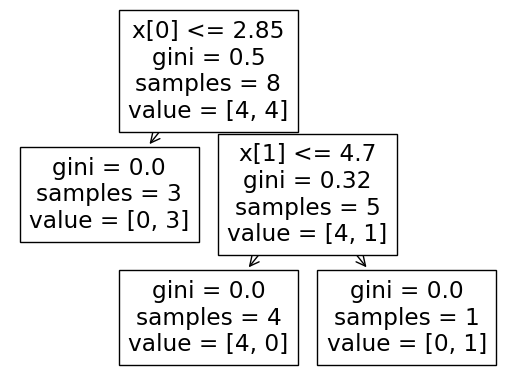

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.4


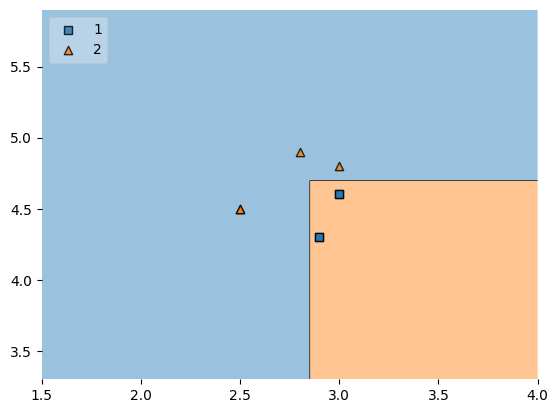

In [47]:
#1st model
dt_bag1=DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [48]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),species
97,2.9,4.3,1
121,2.8,4.9,2
121,2.8,4.9,2
123,2.7,4.9,2
123,2.7,4.9,2
50,3.2,4.7,1
50,3.2,4.7,1
138,3.0,4.8,2


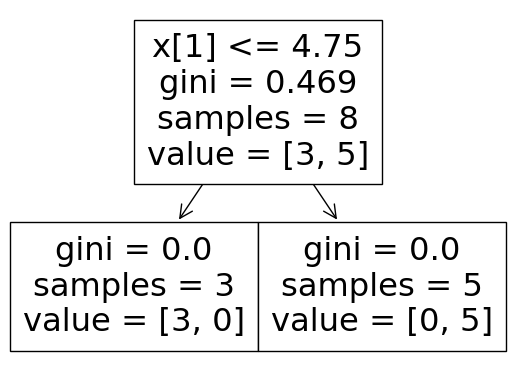

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


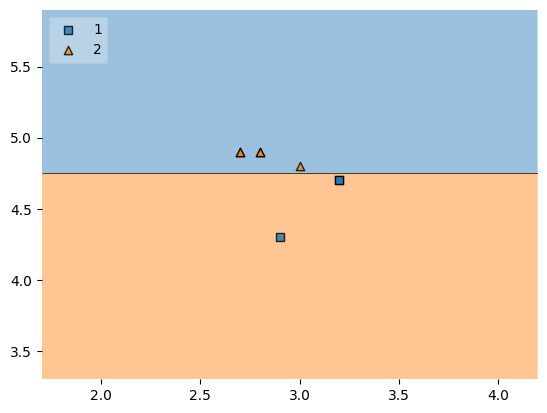

In [49]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

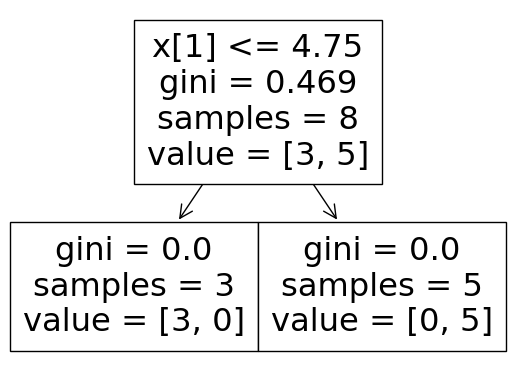

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


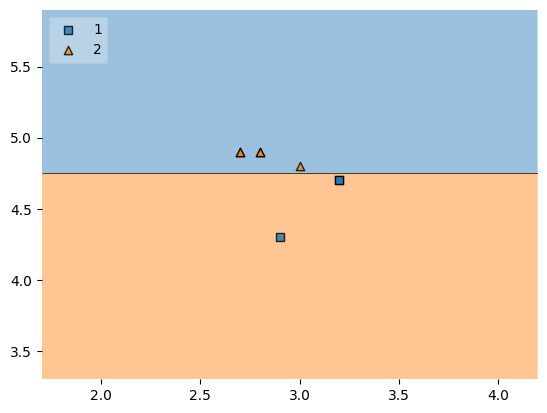

In [50]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [51]:
df_test

,sepal width (cm),petal length (cm),species
149,3.0,5.1,2
143,3.2,5.9,2
118,2.6,6.9,2
88,3.0,4.1,1
133,2.8,5.1,2


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
print('predictor1',dt_bag1.predict(np.array([2.6,6.9]).reshape(1,2)))
print('predictor2',dt_bag2.predict(np.array([2.6,6.9]).reshape(1,2)))
print('predictor3',dt_bag3.predict(np.array([2.6,6.9]).reshape(1,2)))


predictor1 [2]
predictor2 [2]
predictor3 [2]


# Pasting

In [57]:
#row sampling without replacement

df_train

,sepal width (cm),petal length (cm),species
140,3.1,5.6,2
106,2.5,4.5,2
116,3.0,5.5,2
123,2.7,4.9,2
97,2.9,4.3,1
121,2.8,4.9,2
128,2.8,5.6,2
91,3.0,4.6,1
138,3.0,4.8,2
50,3.2,4.7,1


In [58]:
df_train.sample(8)

,sepal width (cm),petal length (cm),species
116,3.0,5.5,2
121,2.8,4.9,2
97,2.9,4.3,1
91,3.0,4.6,1
128,2.8,5.6,2
138,3.0,4.8,2
123,2.7,4.9,2
50,3.2,4.7,1


In [62]:
iris = datasets.load_iris()
df1 = pd.DataFrame(iris.data, columns=iris.feature_names)
df1['species'] = iris.target

In [63]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
df1.sample(2,replace=True,axis=1)

,species,petal width (cm)
0,0,0.2
1,0,0.2
2,0,0.2
3,0,0.2
4,0,0.2
...,...,...
145,2,2.3
146,2,1.9
147,2,2.0
148,2,2.3


In [65]:
# random patches
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [66]:
#row and column both

df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal width (cm),sepal width (cm)
91,1.4,3.0
102,2.1,3.0
25,0.2,3.0
95,1.2,3.0
42,0.2,3.2
44,0.4,3.8
57,1.0,2.4
130,1.9,2.8
